# Finding best model with Gaussian Process Regression (GPR)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
# import own modules
import run_gpr
from gpr_alg import plot_data

# import external modules
import warnings
import pandas as pd
import numpy as np
import sklearn.gaussian_process as gp

## Find best model

We start be performing a grid search to find the best model for the given dataset. The ouput is saved in a file.

In [4]:
# Load statistics from model fitting with different kernels
store = pd.HDFStore('grid_search_stats_2D_100_iterations_with_noise.h5')
model_stats = store['df']

model_stats

,kernel,stats,pred_mean,pred_cov
0,RBF: {'length_scale': 9.999999999999997e-06},0.111365,"[-0.357686162813587, 0.31376967450947496, 1.16...","[[1.4999997743903037e-07, 0.0, 0.0, 0.0, 0.0, ..."
6,RationalQuadratic: {'length_scale': 1.00011094...,0.111365,"[-0.3576861628135698, 0.3137696745095473, 1.16...","[[1.4999997688391886e-07, 2.924910645987506e-2..."
7,RationalQuadratic: {'length_scale': 0.03768305...,0.079101,"[-0.3576860194627516, 0.31376995900028426, 1.1...","[[1.4999993713793458e-07, 4.9182879990894435e-..."
8,RationalQuadratic: {'length_scale': 0.03768299...,0.079101,"[-0.35768601946208456, 0.31376995900074656, 1....","[[1.4999993525055544e-07, 4.807265696626928e-1..."
9,RationalQuadratic: {'length_scale': 0.03768307...,0.079101,"[-0.35768601946234524, 0.3137699590007159, 1.1...","[[1.4999993969144754e-07, 4.8627768478581856e-..."
10,RationalQuadratic: {'length_scale': 0.03768302...,0.079101,"[-0.35768601946245804, 0.31376995900048055, 1....","[[1.4999994002451444e-07, 4.8627768478581856e-..."
11,RationalQuadratic: {'length_scale': 0.03768304...,0.079101,"[-0.3576860194620335, 0.31376995900090154, 1.1...","[[1.4999993691588998e-07, 4.884981308350689e-1..."
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.375367,"[0.007780296665328201, 0.5131220787048107, 1.1...","[[0.29357257444001583, 0.03544527216630233, 0...."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.079113,"[-0.3576794526225866, 0.31377630424917236, 1.1...","[[1.5149926310353834e-05, 5.7131632758000706e-..."


In [5]:
# Sort dataframe
model_stats = model_stats.sort_values(by=['stats'])
model_stats

,kernel,stats,pred_mean,pred_cov
8,RationalQuadratic: {'length_scale': 0.03768299...,0.079101,"[-0.35768601946208456, 0.31376995900074656, 1....","[[1.4999993525055544e-07, 4.807265696626928e-1..."
11,RationalQuadratic: {'length_scale': 0.03768304...,0.079101,"[-0.3576860194620335, 0.31376995900090154, 1.1...","[[1.4999993691588998e-07, 4.884981308350689e-1..."
10,RationalQuadratic: {'length_scale': 0.03768302...,0.079101,"[-0.35768601946245804, 0.31376995900048055, 1....","[[1.4999994002451444e-07, 4.8627768478581856e-..."
9,RationalQuadratic: {'length_scale': 0.03768307...,0.079101,"[-0.35768601946234524, 0.3137699590007159, 1.1...","[[1.4999993969144754e-07, 4.8627768478581856e-..."
7,RationalQuadratic: {'length_scale': 0.03768305...,0.079101,"[-0.3576860194627516, 0.31376995900028426, 1.1...","[[1.4999993713793458e-07, 4.9182879990894435e-..."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.079113,"[-0.3576794526225866, 0.31377630424917236, 1.1...","[[1.5149926310353834e-05, 5.7131632758000706e-..."
6,RationalQuadratic: {'length_scale': 1.00011094...,0.111365,"[-0.3576861628135698, 0.3137696745095473, 1.16...","[[1.4999997688391886e-07, 2.924910645987506e-2..."
0,RBF: {'length_scale': 9.999999999999997e-06},0.111365,"[-0.357686162813587, 0.31376967450947496, 1.16...","[[1.4999997743903037e-07, 0.0, 0.0, 0.0, 0.0, ..."
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.375367,"[0.007780296665328201, 0.5131220787048107, 1.1...","[[0.29357257444001583, 0.03544527216630233, 0...."


In [6]:
for row in range(model_stats.shape[0]):
    print(model_stats['kernel'].iloc[row])

RationalQuadratic: {'length_scale': 0.03768299562245502, 'alpha': 0.16964699271719907}
RationalQuadratic: {'length_scale': 0.03768304163419686, 'alpha': 0.1696469955854259}
RationalQuadratic: {'length_scale': 0.03768302753919557, 'alpha': 0.1696475176975934}
RationalQuadratic: {'length_scale': 0.03768307900202671, 'alpha': 0.1696474427903255}
RationalQuadratic: {'length_scale': 0.03768305684629515, 'alpha': 0.1696479321376356}
RationalQuadratic + WhiteKernel: {'k1': RationalQuadratic(alpha=0.17, length_scale=0.0377), 'k2': WhiteKernel(noise_level=1e-05), 'k1__length_scale': 0.03768498164799617, 'k1__alpha': 0.1696490731506275, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k1__alpha_bounds': (1e-05, 100000.0), 'k2__noise_level': 9.999999999999997e-06, 'k2__noise_level_bounds': (1e-05, 100000.0)}
RationalQuadratic: {'length_scale': 1.0001109466415316e-05, 'alpha': 0.999097751210484}
RBF: {'length_scale': 9.999999999999997e-06}
RBF + WhiteKernel: {'k1': RBF(length_scale=0.222), 'k2': Whi

We compare the analyse the fit with the mean absolut error and a model where the kernel includes a white noise kernel.

In [7]:
# Get model with smallest mean absolut error
mean_prediction_best =  model_stats['pred_mean'].iloc[0]
cov_prediction_best = model_stats['pred_cov'].iloc[0]

print('Kernel: ' + str(model_stats['kernel'].iloc[0]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[0]))

Kernel: RationalQuadratic: {'length_scale': 0.03768299562245502, 'alpha': 0.16964699271719907}
Mean absolut error: 0.07910126342447933


In [8]:
# Get model with white noise kernel
mean_prediction_wk =  model_stats['pred_mean'].iloc[8]
cov_prediction_wk = model_stats['pred_cov'].iloc[8]

print('Kernel: ' + str(model_stats['kernel'].iloc[8]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[8]))

Kernel: RBF + WhiteKernel: {'k1': RBF(length_scale=0.222), 'k2': WhiteKernel(noise_level=0.243), 'k1__length_scale': 0.2222434227810269, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.2434084534170143, 'k2__noise_level_bounds': (1e-05, 100000.0)}
Mean absolut error: 0.37536730002792834


In [9]:
# Load grid and data
grid_x1, grid_x2, grid_train, full_grid, data_train, data = run_gpr.create_2D_data(add_noise=True)

train set size: 0.79


<IPython.core.display.Javascript object>


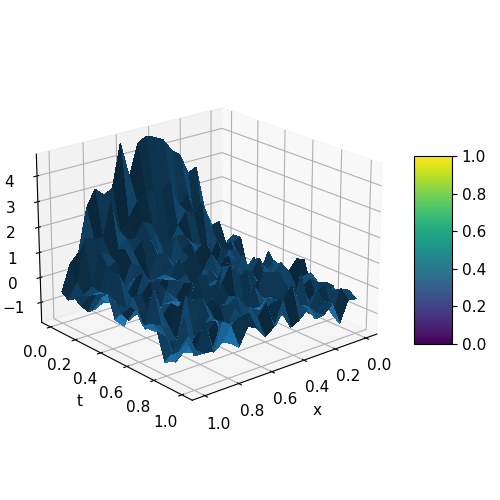

In [13]:
# Plot original data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='original_data_noise.png')

<IPython.core.display.Javascript object>


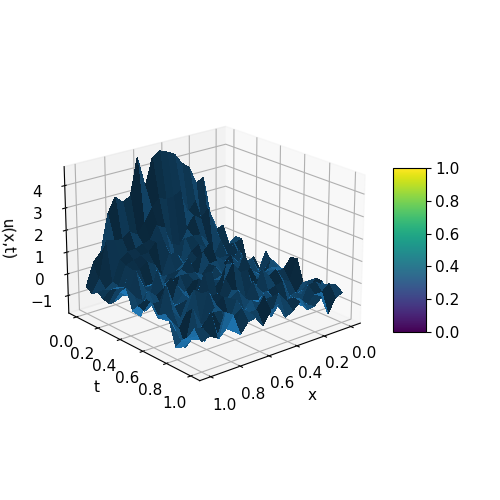

<IPython.core.display.Javascript object>


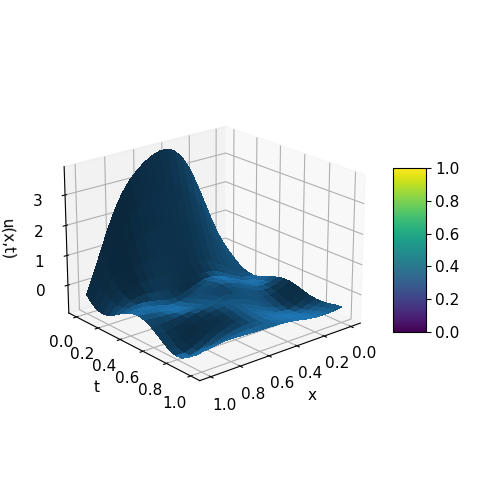

In [14]:
# Plot fitted data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='fitted_data_noise.png')

plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='fitted_data_noise_wk.png')

<IPython.core.display.Javascript object>


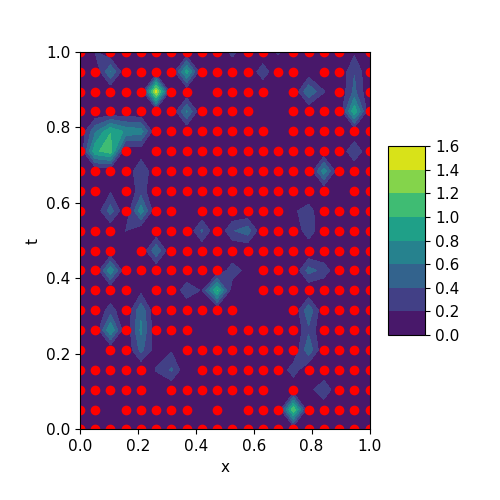

<IPython.core.display.Javascript object>


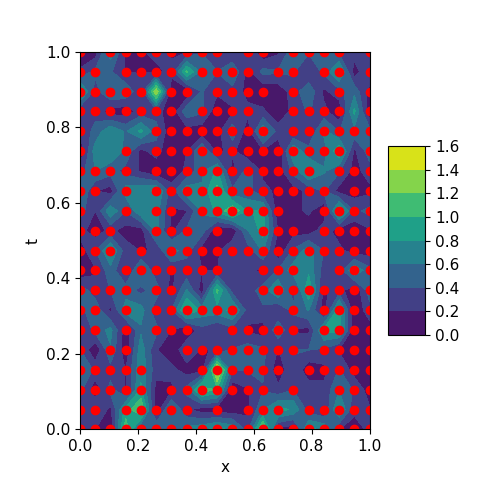

In [17]:
error_best = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))
error_wk = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))

# Plot error
plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_best, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise.png')

plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_wk, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise_wk.png')

<IPython.core.display.Javascript object>


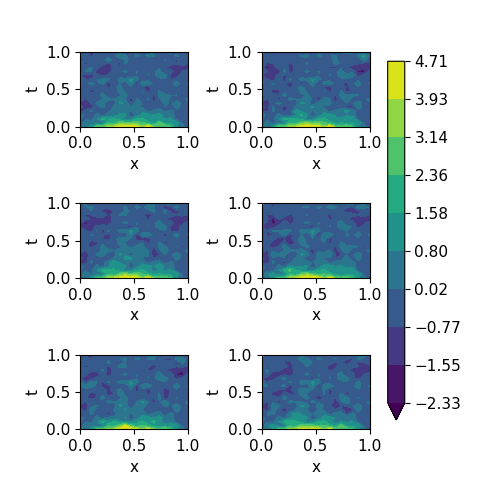

<IPython.core.display.Javascript object>


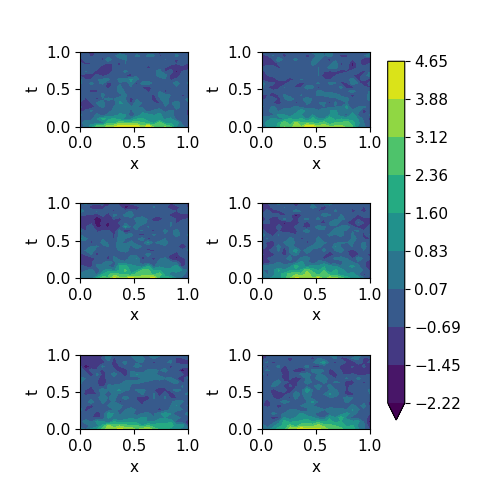

In [16]:
# Plot posteriors
posteriors = plot_data.plot_posteriors(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), mean_pred=mean_prediction_best.flatten(),
                                               cov_pred=cov_prediction_best,
                                               posterior_nums=5, add_train_ind=False, x_train_val=grid_train, file_name='posteriors_noise.png')

posteriors = plot_data.plot_posteriors(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), mean_pred=mean_prediction_wk.flatten(),
                                               cov_pred=cov_prediction_wk,
                                               posterior_nums=5, add_train_ind=False, x_train_val=grid_train, file_name='posteriors_noise_wk.png')

## Fit specific model